# Feature Engineering

In [1]:
import pandas as pd

df_combined = pd.read_csv(r'C:\Users\boris\Documents\M&T\Financial Innovation\Afstuderen\Scriptie\Data_verkennen_cleanen\df_combined.csv')


In [2]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,value,value_classification
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear
...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,Greed


## Standaard diviation price data

In [3]:
# Calculate daily price standard deviation using High and Low prices
df_combined['daily_std'] = (df_combined['High'] - df_combined['Low']) / 2

# Display first few rows to verify the new column
print("DataFrame with daily standard deviation:")
print(df_combined[['Timestamp', 'High', 'Low', 'daily_std']].head())



DataFrame with daily standard deviation:
    Timestamp      High      Low  daily_std
0  2018-02-01  10187.56  8820.96    683.300
1  2018-02-02   9234.10  7625.25    804.425
2  2018-02-03   9443.96  8170.71    636.625
3  2018-02-04   9491.20  8189.32    650.940
4  2018-02-05   8416.03  6865.66    775.185


In [4]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,value,value_classification,daily_std
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185
...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,Greed,1743.000


## Moving Avarages (MA) 
- 7-day MA 
- 30-day MA

In [5]:
# Load historical price data from 2012-2025
df_historical = pd.read_csv(r'C:\Users\boris\Documents\M&T\Financial Innovation\Afstuderen\Scriptie\Data_verkennen_cleanen\btc_price_2012_2025.csv')

# Convert Timestamp to datetime
df_historical['Timestamp'] = pd.to_datetime(df_historical['Timestamp'])
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'])

# Calculate MA on historical data
df_historical['MA7'] = df_historical['Close'].rolling(window=7).mean()
df_historical['MA30'] = df_historical['Close'].rolling(window=30).mean()

# Get MA values for dates in df_combined by merging
df_combined = pd.merge(df_combined, 
                      df_historical[['Timestamp', 'MA7', 'MA30']], 
                      on='Timestamp',
                      how='left')

# Display first few rows to verify the new columns
print("DataFrame with moving averages:")
print(df_combined.head(10))


DataFrame with moving averages:
   Timestamp     Open      High      Low    Close        Volume  value  \
0 2018-02-01  9974.91  10187.56  8820.96  8970.00  20517.085284   30.0   
1 2018-02-02  8970.00   9234.10  7625.25  8580.00  47828.982222   15.0   
2 2018-02-03  8551.19   9443.96  8170.71  9386.72  17968.929040   40.0   
3 2018-02-04  9391.30   9491.20  8189.32  8301.65  14407.720751   24.0   
4 2018-02-05  8301.65   8416.03  6865.66  6877.61  37314.242065   11.0   
5 2018-02-06  6877.61   7486.98  5920.72  7162.31  70503.744493    8.0   
6 2018-02-07  7170.00   8649.00  7160.38  8239.40  43855.539579   36.0   
7 2018-02-08  8239.40   8644.36  7543.27  8218.66  23954.174995   30.0   
8 2018-02-09  8218.11   8779.62  7753.32  8622.27  20171.263839   44.0   
9 2018-02-10  8622.27   9090.80  8254.00  8322.01  14961.569164   54.0   

  value_classification  daily_std           MA7          MA30  
0                 Fear    683.300  10602.648571  12637.540000  
1         Extreme Fear   

In [6]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,value,value_classification,daily_std,MA7,MA30
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300,10602.648571,12637.540000
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425,10250.204286,12429.063333
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625,9956.165714,12249.274000
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940,9484.974286,11980.415000
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185,8862.992857,11650.574333
...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000,103740.571429,95361.833333
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500,103814.142857,96010.500000
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000,103577.571429,96617.133333
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,Greed,1743.000,103919.142857,97352.200000


## Market regime (Bear And Bull markets)

In [7]:
# Calculate 50-day and 200-day MA on historical data
df_historical['MA50'] = df_historical['Close'].rolling(window=50).mean()
df_historical['MA200'] = df_historical['Close'].rolling(window=200).mean()

# Create binary market regime column (0 for bear, 1 for bull)
df_historical['market_regime'] = (df_historical['MA50'] > df_historical['MA200']).astype(int)

# Merge market regime into df_combined
df_combined = pd.merge(df_combined,
                      df_historical[['Timestamp', 'market_regime']],
                      on='Timestamp',
                      how='left')

# Display first few rows to verify the new column
print("\nDataFrame with market regime:")
print(df_combined.head())



DataFrame with market regime:
   Timestamp     Open      High      Low    Close        Volume  value  \
0 2018-02-01  9974.91  10187.56  8820.96  8970.00  20517.085284   30.0   
1 2018-02-02  8970.00   9234.10  7625.25  8580.00  47828.982222   15.0   
2 2018-02-03  8551.19   9443.96  8170.71  9386.72  17968.929040   40.0   
3 2018-02-04  9391.30   9491.20  8189.32  8301.65  14407.720751   24.0   
4 2018-02-05  8301.65   8416.03  6865.66  6877.61  37314.242065   11.0   

  value_classification  daily_std           MA7          MA30  market_regime  
0                 Fear    683.300  10602.648571  12637.540000              1  
1         Extreme Fear    804.425  10250.204286  12429.063333              1  
2                 Fear    636.625   9956.165714  12249.274000              1  
3         Extreme Fear    650.940   9484.974286  11980.415000              1  
4         Extreme Fear    775.185   8862.992857  11650.574333              1  


Market Regime Distribution:
Bear Market (0): 45.2%
Bull Market (1): 54.8%

Market Regime Periods:
Bull Market: 2018-02-01 to 2018-04-01
Bear Market: 2018-04-01 to 2019-04-23
Bull Market: 2019-04-23 to 2019-10-26
Bear Market: 2019-10-26 to 2020-02-19
Bull Market: 2020-02-19 to 2020-03-26
Bear Market: 2020-03-26 to 2020-05-21
Bull Market: 2020-05-21 to 2021-06-19
Bear Market: 2021-06-19 to 2021-09-15
Bull Market: 2021-09-15 to 2022-01-15
Bear Market: 2022-01-15 to 2023-02-07
Bull Market: 2023-02-07 to 2023-09-12
Bear Market: 2023-09-12 to 2023-10-30
Bull Market: 2023-10-30 to 2024-08-10
Bear Market: 2024-08-10 to 2024-10-27
Bull Market: 2024-10-27 to 2025-04-07
Bear Market: 2025-04-07 to 2025-05-19


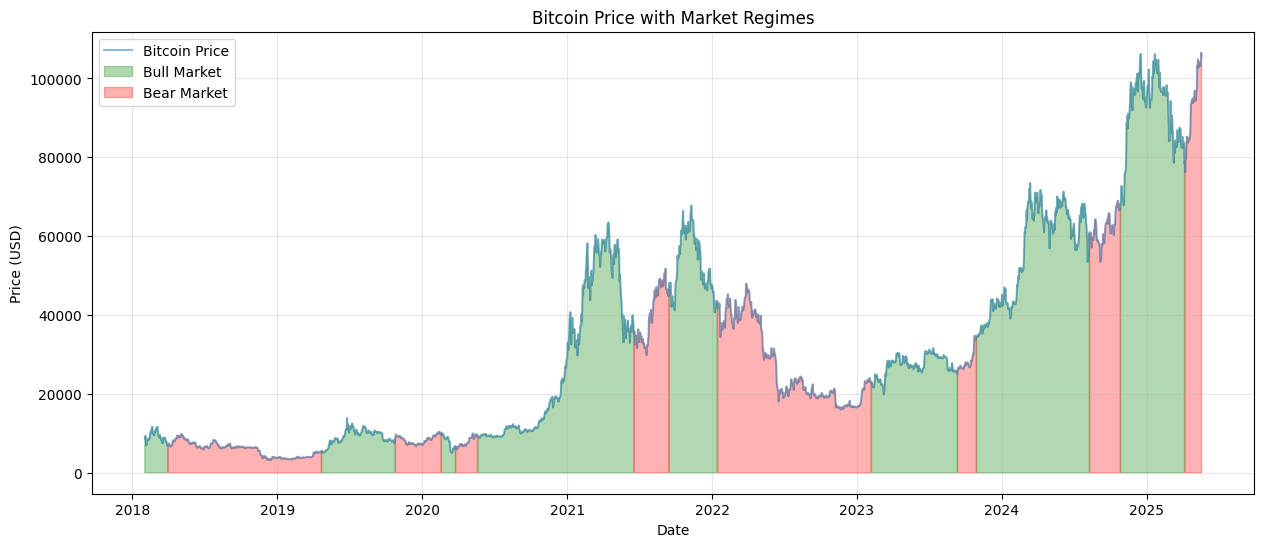

In [9]:
# Import matplotlib
import matplotlib.pyplot as plt

# Calculate distribution of market regimes
regime_dist = df_combined['market_regime'].value_counts(normalize=True) * 100

print("Market Regime Distribution:")
print(f"Bear Market (0): {regime_dist[0]:.1f}%")
print(f"Bull Market (1): {regime_dist[1]:.1f}%")

# Find periods of bull and bear markets
df_combined['regime_change'] = df_combined['market_regime'].diff().ne(0)
regime_periods = df_combined[df_combined['regime_change']]

print("\nMarket Regime Periods:")
prev_regime = None
prev_date = None

for idx, row in regime_periods.iterrows():
    current_date = row['Timestamp'].strftime('%Y-%m-%d')
    current_regime = "Bull" if row['market_regime'] == 1 else "Bear"
    
    if prev_regime is not None:
        print(f"{prev_regime} Market: {prev_date} to {current_date}")
    
    prev_regime = current_regime
    prev_date = current_date

# Print last period
last_date = df_combined['Timestamp'].iloc[-1].strftime('%Y-%m-%d')
print(f"{prev_regime} Market: {prev_date} to {last_date}")

# Create a visualization
plt.figure(figsize=(15, 6))
plt.plot(df_combined['Timestamp'], df_combined['Close'], label='Bitcoin Price', alpha=0.5)
plt.fill_between(df_combined['Timestamp'], df_combined['Close'], 
                 where=df_combined['market_regime'] == 1,
                 color='green', alpha=0.3, label='Bull Market')
plt.fill_between(df_combined['Timestamp'], df_combined['Close'], 
                 where=df_combined['market_regime'] == 0,
                 color='red', alpha=0.3, label='Bear Market')
plt.title('Bitcoin Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [10]:
# Save df_combined as df_geen_mempool.csv before adding mempool data
df_combined.to_csv('df_geen_mempool.csv', index=False)



In [16]:
df_combined = df_combined.drop(columns=['regime_change', 'value_classification'])

In [17]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,value,daily_std,MA7,MA30,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,683.300,10602.648571,12637.540000,1
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,804.425,10250.204286,12429.063333,1
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,636.625,9956.165714,12249.274000,1
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,650.940,9484.974286,11980.415000,1
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,775.185,8862.992857,11650.574333,1
...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,1371.000,103740.571429,95361.833333,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,716.500,103814.142857,96010.500000,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,526.000,103577.571429,96617.133333,0
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,1743.000,103919.142857,97352.200000,0


# Correlaties verkennen

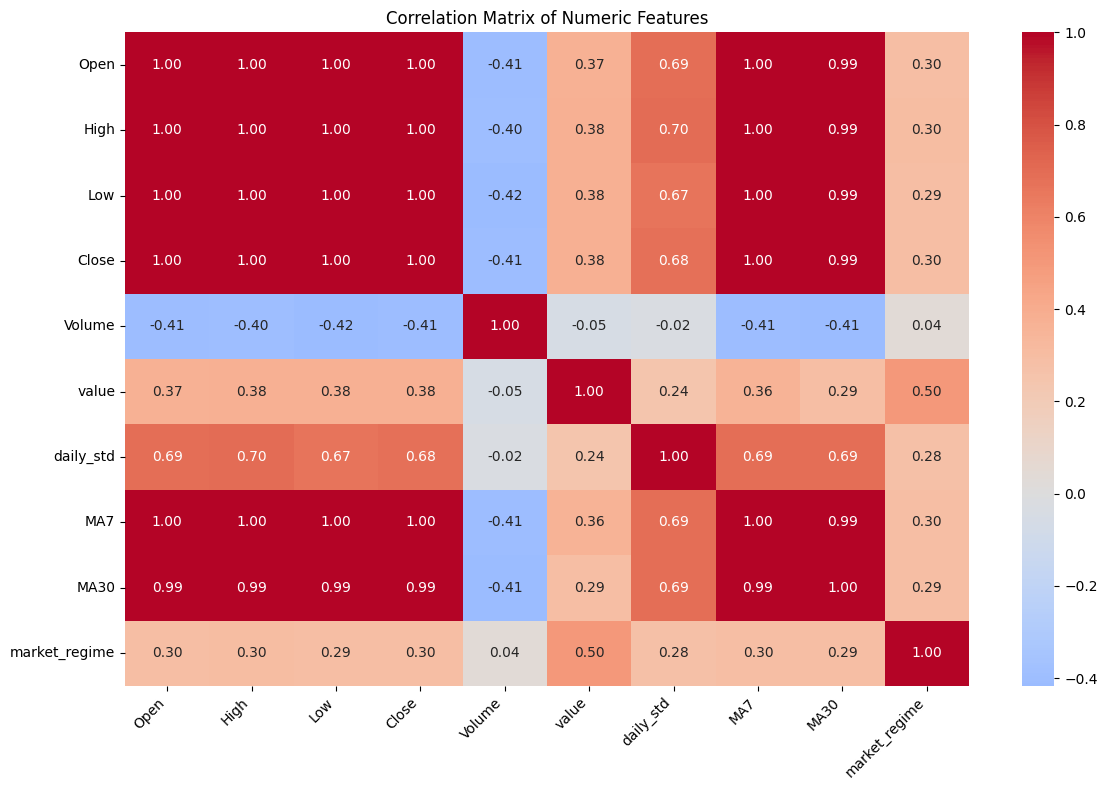


Strongest correlations (|correlation| > 0.5):
Open vs daily_std: 0.686
High vs Open: 0.999
High vs Low: 0.999
High vs daily_std: 0.698
High vs MA7: 0.999
High vs MA30: 0.990
Low vs Open: 0.999
Low vs daily_std: 0.666
Low vs MA7: 0.998
Low vs MA30: 0.990
Close vs Open: 0.999
Close vs High: 1.000
Close vs Low: 0.999
Close vs daily_std: 0.684
Close vs MA7: 0.998
Close vs MA30: 0.990
MA7 vs Open: 0.999
MA7 vs daily_std: 0.690
MA30 vs Open: 0.991
MA30 vs daily_std: 0.688
MA30 vs MA7: 0.994
market_regime vs value: 0.505


In [19]:
# Import seaborn
import seaborn as sns

# Calculate correlation matrix for numeric columns only
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_combined[numeric_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.5)
print("\nStrongest correlations (|correlation| > 0.5):")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 < col2:  # Avoid printing duplicates and self-correlations
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) > 0.5:
                print(f"{col1} vs {col2}: {corr:.3f}")


### Ik neem alleen de close prijs omdat de holc 100% met elkaar correleren. 

In [22]:
# Drop high, low and open prices since they highly correlate with close price
df_combined = df_combined.drop(columns=['High', 'Low', 'Open'])


In [23]:
# Save dataframe to CSV
df_combined.to_csv('df_lage_corr.csv', index=False)


In [24]:
df_combined

,Timestamp,Close,Volume,value,daily_std,MA7,MA30,market_regime
0,2018-02-01,8970.00,20517.085284,30.0,683.300,10602.648571,12637.540000,1
1,2018-02-02,8580.00,47828.982222,15.0,804.425,10250.204286,12429.063333,1
2,2018-02-03,9386.72,17968.929040,40.0,636.625,9956.165714,12249.274000,1
3,2018-02-04,8301.65,14407.720751,24.0,650.940,9484.974286,11980.415000,1
4,2018-02-05,6877.61,37314.242065,11.0,775.185,8862.992857,11650.574333,1
...,...,...,...,...,...,...,...,...
2660,2025-05-15,103793.00,1339.093301,70.0,1371.000,103740.571429,95361.833333,0
2661,2025-05-16,103506.00,994.760377,71.0,716.500,103814.142857,96010.500000,0
2662,2025-05-17,103153.00,459.809889,74.0,526.000,103577.571429,96617.133333,0
2663,2025-05-18,106520.00,905.179396,74.0,1743.000,103919.142857,97352.200000,0


## Avarage Fee per Transaction (mempool data)

In [43]:
# Load mempool data
mempool_data = pd.read_csv('C:/Users/boris/Documents/M&T/Financial Innovation/Afstuderen/Scriptie/Data_verkennen_cleanen/raw_mempool_data.csv')

# Display first few rows
mempool_data.head()


,Date,TotalFees_BTC,mempool_transaction_count,avg_fee_per_tx,MempoolSizeBytes
0,2018-02-01,153.614337,17755.520833,0.008652,5.210158e+07
1,2018-02-02,150.271053,17401.867188,0.008635,5.232593e+07
2,2018-02-03,146.927769,17048.213542,0.008618,5.255029e+07
3,2018-02-04,141.076100,12023.375000,0.011733,3.624007e+07
4,2018-02-05,135.224430,6998.536458,0.019322,1.992984e+07


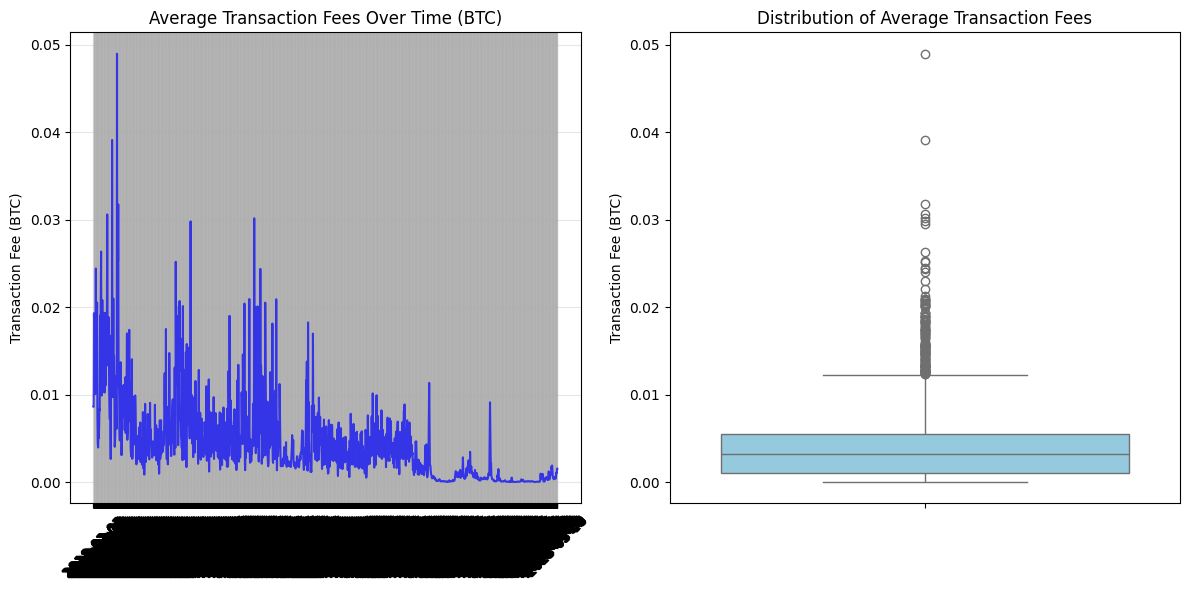

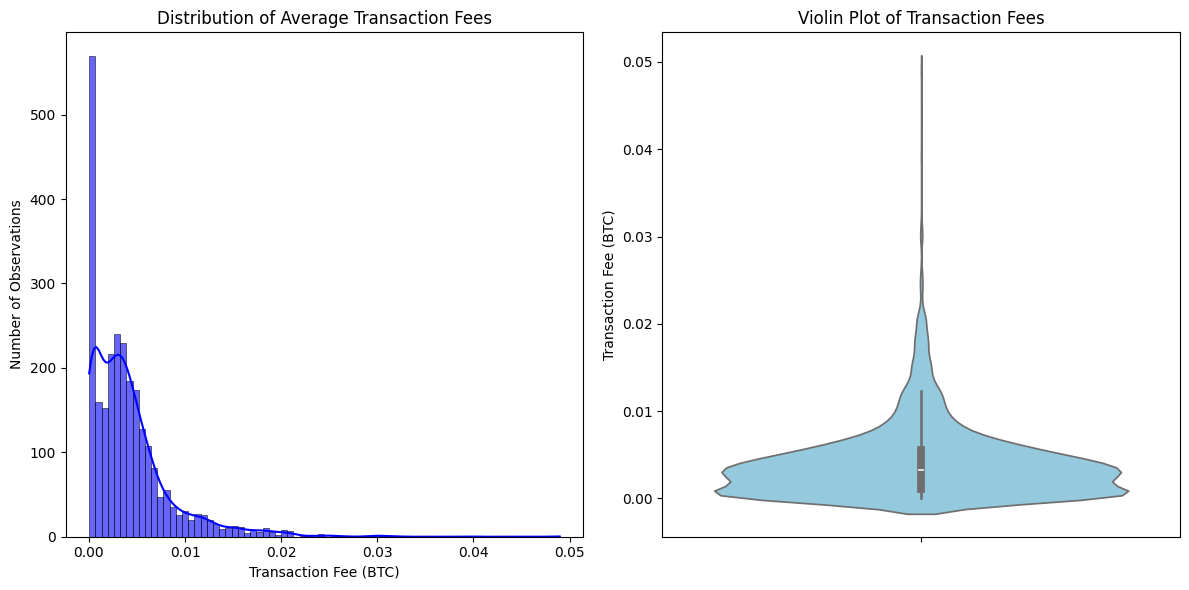

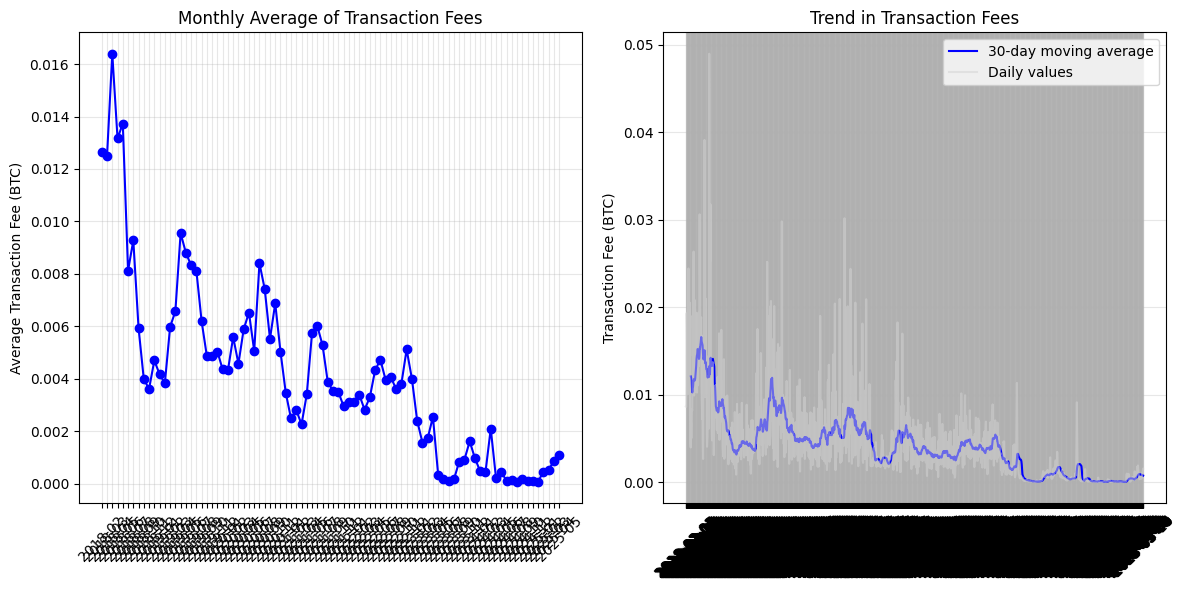

In [44]:
# Explore avg_fee_per_tx
plt.figure(figsize=(12,6))

# Plot 1: Time series of average fee per transaction
plt.subplot(1,2,1)
plt.plot(mempool_data['Date'], mempool_data['avg_fee_per_tx'], color='blue', alpha=0.7)
plt.title('Average Transaction Fees Over Time (BTC)')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Plot 2: Boxplot of average fees
plt.subplot(1,2,2)
sns.boxplot(y=mempool_data['avg_fee_per_tx'], color='skyblue')
plt.title('Distribution of Average Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Histogram and KDE plot
plt.figure(figsize=(12,6))

# Plot 1: Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(data=mempool_data, x='avg_fee_per_tx', kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Average Transaction Fees')
plt.xlabel('Transaction Fee (BTC)')
plt.ylabel('Number of Observations')

# Plot 2: Violin plot
plt.subplot(1,2,2)
sns.violinplot(y=mempool_data['avg_fee_per_tx'], color='skyblue')
plt.title('Violin Plot of Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Monthly average and trend
plt.figure(figsize=(12,6))

# Plot 1: Monthly average
mempool_data['Month'] = pd.to_datetime(mempool_data['Date']).dt.to_period('M')
monthly_avg = mempool_data.groupby('Month')['avg_fee_per_tx'].mean()

plt.subplot(1,2,1)
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, color='blue', marker='o')
plt.title('Monthly Average of Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Average Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Plot 2: Rolling mean
plt.subplot(1,2,2)
plt.plot(mempool_data['Date'], mempool_data['avg_fee_per_tx'].rolling(window=30).mean(), 
         color='blue', label='30-day moving average')
plt.plot(mempool_data['Date'], mempool_data['avg_fee_per_tx'], 
         color='lightgray', alpha=0.5, label='Daily values')
plt.title('Trend in Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Omzetten van Avg fee per transactie in BTC naar USD

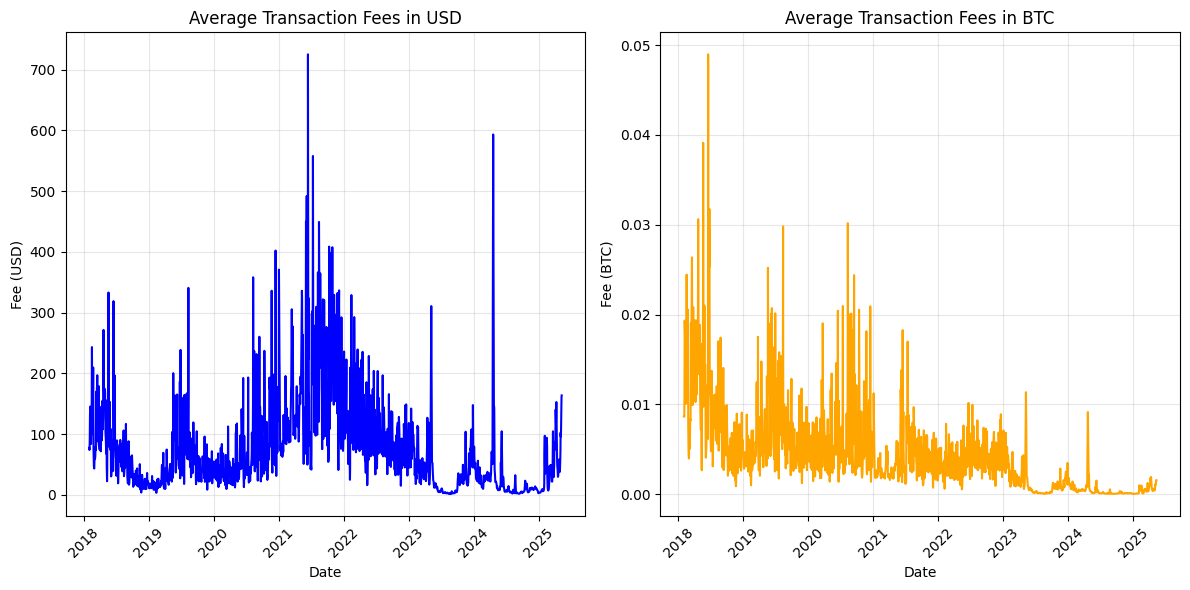

,Date,avg_fee_per_tx,Close,avg_fee_usd
0,2018-02-01,0.008652,8970.00,77.605192
1,2018-02-02,0.008635,8580.00,74.091224
2,2018-02-03,0.008618,9386.72,80.898202
3,2018-02-04,0.011733,8301.65,97.407292
4,2018-02-05,0.019322,6877.61,132.887911
...,...,...,...,...
2651,2025-05-06,0.001048,96814.00,101.468797
2652,2025-05-07,0.001221,97054.00,118.473324
2653,2025-05-08,0.001423,103261.00,146.941729
2654,2025-05-09,0.001558,102991.00,160.472189


In [45]:
# Make sure both dataframes have datetime columns with same name
mempool_data['Date'] = pd.to_datetime(mempool_data['Date'])
df_combined['Date'] = pd.to_datetime(df_combined['Timestamp'])

# Merge data on date
merged = pd.merge(mempool_data[['Date', 'avg_fee_per_tx']], df_combined[['Date', 'Close']], on='Date', how='inner')

# Calculate fee in USD
merged['avg_fee_usd'] = merged['avg_fee_per_tx'] * merged['Close']

plt.figure(figsize=(12,6))

# Plot 1: Fees in USD
plt.subplot(1,2,1)
plt.plot(merged['Date'], merged['avg_fee_usd'], color='blue')
plt.title('Average Transaction Fees in USD')
plt.xlabel('Date')
plt.ylabel('Fee (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Fees in BTC
plt.subplot(1,2,2)
plt.plot(merged['Date'], merged['avg_fee_per_tx'], color='orange')
plt.title('Average Transaction Fees in BTC')
plt.xlabel('Date')
plt.ylabel('Fee (BTC)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

merged


In [46]:
# Merge mempool_data with avg_fee_usd from merged dataframe
mempool_data = pd.merge(mempool_data, merged[['Date', 'avg_fee_usd']], on='Date', how='left')

# Drop specified columns
mempool_data = mempool_data.drop(['Month', 'avg_fee_per_tx', 'TotalFees_BTC'], axis=1)

# Display first few rows to verify the merge
mempool_data.head()


,Date,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,17755.520833,5.210158e+07,77.605192
1,2018-02-02,17401.867188,5.232593e+07,74.091224
2,2018-02-03,17048.213542,5.255029e+07,80.898202
3,2018-02-04,12023.375000,3.624007e+07,97.407292
4,2018-02-05,6998.536458,1.992984e+07,132.887911


Log transformaties: 

In [48]:
# Import numpy
import numpy as np

# Apply log transformation to all numeric columns except Date
numeric_columns = mempool_data.select_dtypes(include=['float64', 'int64']).columns
mempool_data[numeric_columns] = np.log(mempool_data[numeric_columns])

# Display first few rows to verify the transformation
mempool_data.head()


,Date,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,9.784452,17.768706,4.351634
1,2018-02-02,9.764333,17.773003,4.305297
2,2018-02-03,9.743801,17.777281,4.393192
3,2018-02-04,9.394608,17.405676,4.578901
4,2018-02-05,8.853456,16.807729,4.889506


In [49]:
# Save mempool_data to CSV
mempool_data.to_csv('mempool_data.csv', index=False)


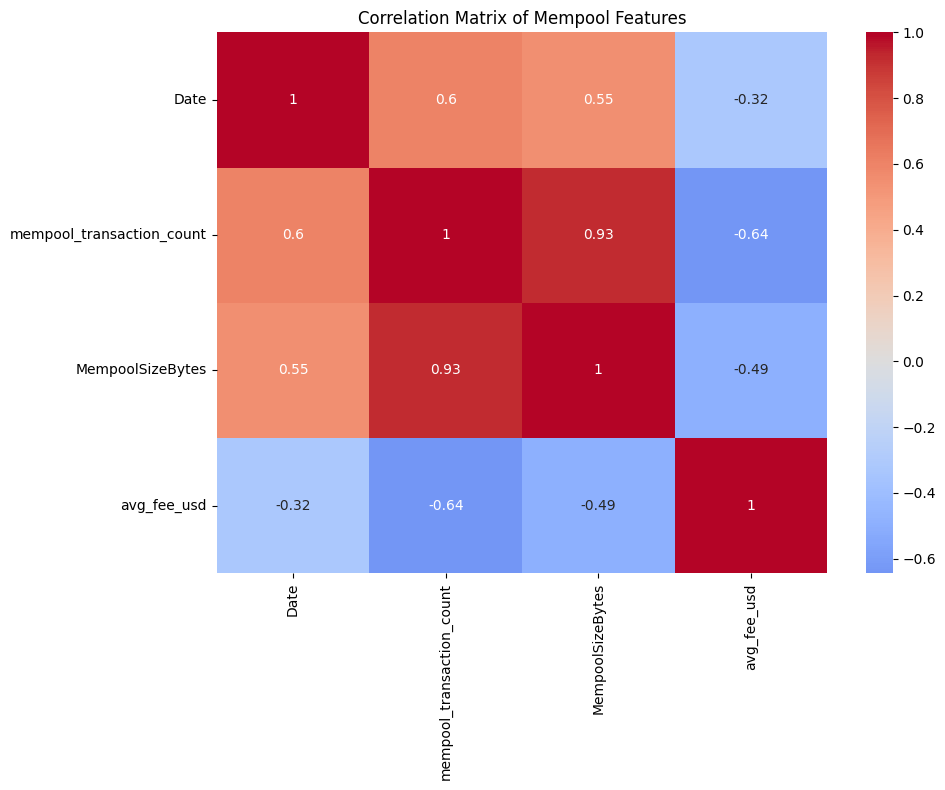

In [50]:
# Calculate correlation matrix for mempool_data features
correlation_matrix = mempool_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Mempool Features')
plt.tight_layout()
plt.show()
